In [3]:
import pandas as pd
import numpy as np

df01 = pd.read_csv('C:/Users/A202112006/Desktop/py/data/student_data.csv')
df01.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


In [6]:
## 1. EDA
df01.info()
# famrel ~ absences 결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [8]:
df01.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
count,394.000000,393.000000,392.000000,391.000000,393.000000,391.000000,392.000000,395.000000,395.000000,395.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020,10.660759,10.908861,10.713924
std,0.897794,0.994265,1.112397,0.873266,1.287778,1.386949,8.013393,3.719390,3.319195,3.761505
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,9.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,19.000000


(array([349.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

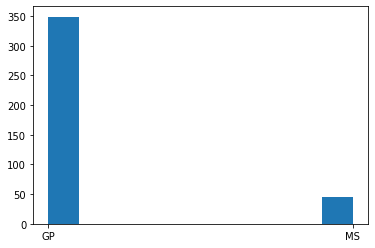

In [9]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.hist(df01['school'])

(array([194.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 201.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

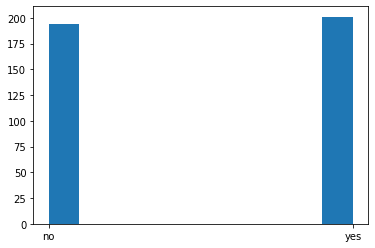

In [13]:
plt.hist(df01['activities'])

(array([ 8., 18., 29., 48., 50., 76., 73., 59., 21., 13.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <BarContainer object of 10 artists>)

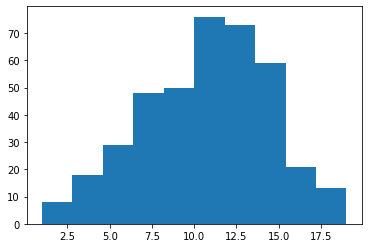

In [14]:
plt.hist(df01['grade'])
# 평균 10.6, 중앙값 11로 분포가 오른쪽으로 조금 치우쳐 있음

(array([ 2., 31., 37., 72., 51., 74., 63., 24., 30., 11.]),
 array([ 3. ,  4.6,  6.2,  7.8,  9.4, 11. , 12.6, 14.2, 15.8, 17.4, 19. ]),
 <BarContainer object of 10 artists>)

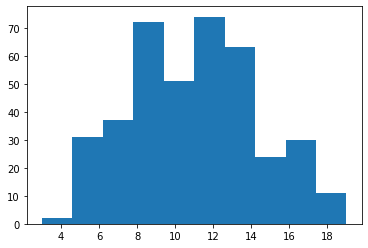

In [16]:
plt.hist(df01['G1'])

(array([13.,  0., 16., 35., 82., 81., 78., 57., 18., 15.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

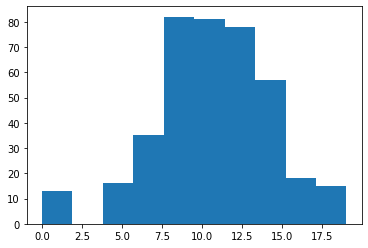

In [17]:
plt.hist(df01['G2'])

In [18]:
df01.corr(method = 'pearson')
# G1, G2와 상관관계가 0.91, 0.96 으로 매우 높음

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
famrel,1.000000,0.150423,0.070786,-0.093578,-0.107129,0.100663,-0.048382,0.019283,0.022046,-0.018550
freetime,0.150423,1.000000,0.291859,0.207442,0.145401,0.071042,-0.061367,0.002655,0.007682,-0.013058
goout,0.070786,0.291859,1.000000,0.254985,0.418976,-0.002893,0.041860,-0.151587,-0.146386,-0.157856
Dalc,-0.093578,0.207442,0.254985,1.000000,0.643805,0.059272,0.108628,-0.068208,-0.092063,-0.053369
Walc,-0.107129,0.145401,0.418976,0.643805,1.000000,0.086701,0.135848,-0.090999,-0.128076,-0.084789
health,0.100663,0.071042,-0.002893,0.059272,0.086701,1.000000,-0.031690,-0.071952,-0.070849,-0.094068
absences,-0.048382,-0.061367,0.041860,0.108628,0.135848,-0.031690,1.000000,-0.008305,-0.027168,-0.027400
grade,0.019283,0.002655,-0.151587,-0.068208,-0.090999,-0.071952,-0.008305,1.000000,0.916471,0.964517
G1,0.022046,0.007682,-0.146386,-0.092063,-0.128076,-0.070849,-0.027168,0.916471,1.000000,0.852118
G2,-0.018550,-0.013058,-0.157856,-0.053369,-0.084789,-0.094068,-0.027400,0.964517,0.852118,1.000000


In [ ]:
## 2. 결측치를 식별. 예측하는 2가지 방법을 쓰고 이를 선택한 이유를 설명하시요.
# 1) 평균대체 : 각 컬럼의 평균값으로 대체하는 방법
# 2) 최소이웃대체 : 각 결측치의 최소이웃값으로 대체하는 방법
# 평균 대체의 경우 해당 데이터의 분산이 낮아져서 향후, 분석모델링에 부정적인 영향을 줄 수 있음
# 그래서 결측값과 가장 가까운 값으로 결측치를 대체함

In [ ]:
# 최소이웃대체 code는 책을 참고하자 ^^;;